<a href="https://colab.research.google.com/github/pythonpdnp/DL/blob/main/ANN_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

### class

In [2]:
class ANN4Class(nn.Module):
  def __init__(self):
    super().__init__()

    self.input = nn.Linear(2,1)
    self.output = nn.Linear(1,1)

  def forward(self,x):
    x = self.input(x)
    x = F.relu(x)

    x = self.output(x)
    x = torch.sigmoid(x)

    return x

### 기존 코드(데이터 생성기)

In [53]:
def genData(nPerClust=100, blur=1, A=[1,1], B=[5,1]):

  a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
  b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]

  data_np = np.hstack((a,b)).T
  labels_np = np.vstack( (np.zeros((nPerClust,1)), np.ones((nPerClust,1)) ) )           # BCE를 사용할때는 인풋과 label 차원을 같게 해야 함

  data = torch.tensor(data_np).float()
  labels = torch.tensor(labels_np).float()

  return data, labels

### 학습 및 결과 검증

In [54]:
data, labels = genData()

ann4class = ANN4Class()

learningRate = 0.01
lossfn = nn.BCELoss(reduction="mean")
optimizer = torch.optim.SGD(ann4class.parameters(), lr=learningRate)


In [55]:
labels.shape

torch.Size([200, 1])

In [59]:
numEpochs = 5000
losses = torch.zeros(numEpochs)

for epoch in range(numEpochs):
  yhat = ann4class(data)
  loss = lossfn(yhat, labels)
  losses[epoch] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

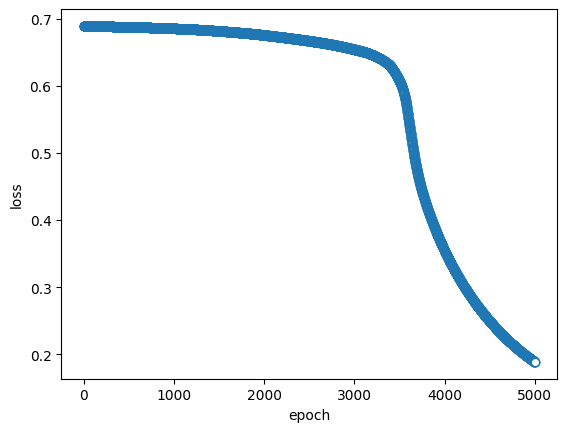

In [60]:
plt.plot(losses.detach(), 'o', mfc='w', lw=0.1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [61]:
pred = ann4class(data)
predLabels = pred > 0.5

miss = np.where(predLabels != labels)[0]
acc = 100-100*len(miss)/len(labels)
acc

98.0

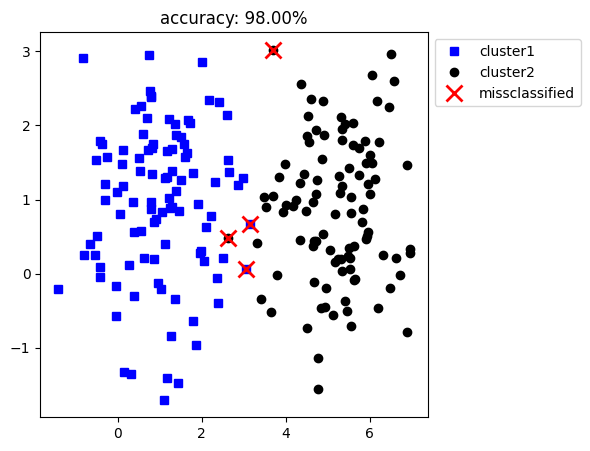

In [62]:
x_miss, y_miss = data[miss,0], data[miss,1]
x1, y1 = data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1]
x2, y2 = data[np.where(labels==1)[0],0], data[np.where(labels==1)[0], 1]

fig = plt.figure(figsize=(5,5))
plt.plot(x1, y1, 'bs', label='cluster1')
plt.plot(x2, y2, 'ko', label='cluster2')
plt.plot(x_miss, y_miss, 'rx', ms=12, mew=2, label='missclassified')
plt.title(f'accuracy: {acc:.2f}%')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [39]:
yhat.shape

torch.Size([200, 1])